## findContours()
* RETR_LIST
* RETR_EXTERNAL
* RETR_CCOMP
* RETR_TREE

#### 5 arguments:
- source image
- the countours found (python list)
- index of contours to draw -> all countours -1
- color
- thickness

#### Sorting
- Orientation -> 
- area -> cv2.contourAre()

#### Approximating contours
cv2.approxPolyDP()



In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

print(f'OpenCV: {cv2.__version__}')

OpenCV: 4.5.1


In [85]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize=(20,15));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img[:,:,::-1]);

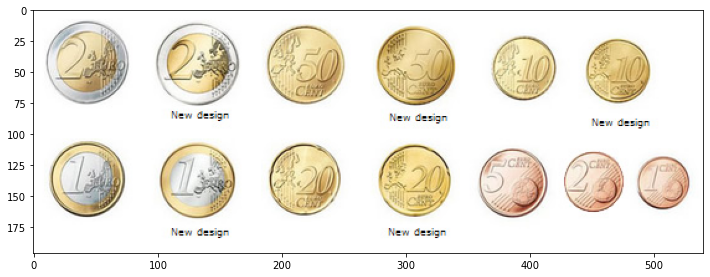

In [80]:
color_coins = cv2.imread('img/coins2.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

In [89]:
gray_coins = cv2.cvtColor(rgb_coins, cv2.COLOR_RGB2GRAY)
coins_gray_inv = cv2.bitwise_not(gray_coins)

In [86]:
imshow(coins_gray_inv, False)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [87]:
contours, h = cv2.findContours(gray_coins, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

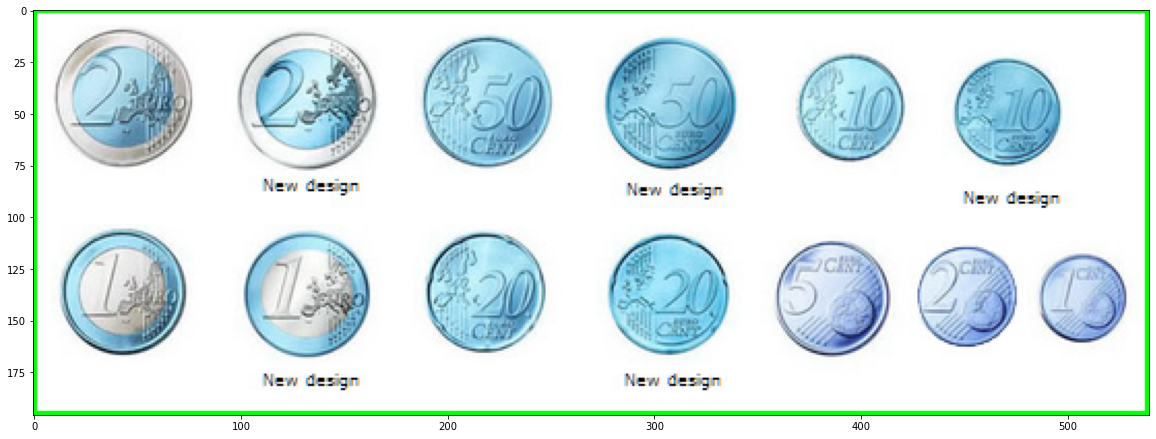

In [88]:
coins_contours = rgb_coins.copy()
cv2.drawContours(coins_contours, contours, -1, (0,255,0), 2)
imshow(coins_contours)

In [78]:
ret, th = cv2.threshold(gray_coins, 244, 255, cv2.THRESH_BINARY_INV)
imshow(th, True, False)

NameError: name 'pltfigure' is not defined

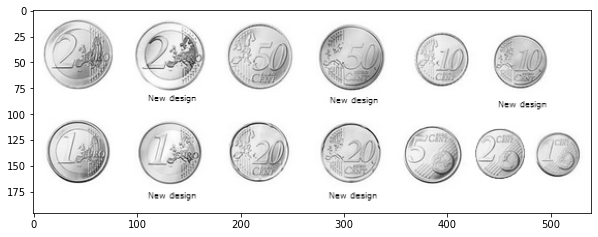

In [35]:
ret, th = cv2.threshold(gray_coins, 200, 255, cv2.THRESH_BINARY)
imshow(gray_coins)

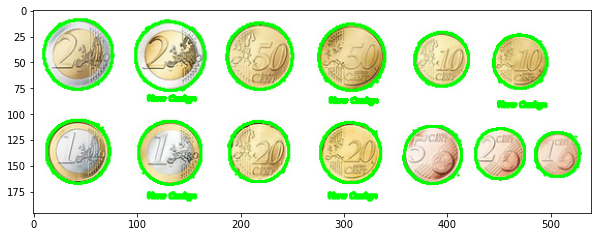

In [39]:
contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
coins_contours = rgb_coins.copy()
cv2.drawContours(coins_contours, contours, -1, (0,255,0), 2)
imshow(coins_contours)

In [40]:
len(contours)

42

In [41]:
cv2.drawContours(coins_contours, contours, -1, (0,255,0),2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [55]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
len(sorted_contours)

42

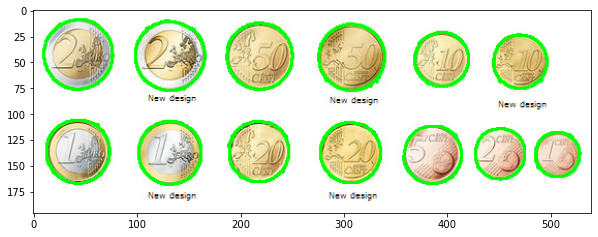

In [62]:
coins_contours = rgb_coins.copy()

cv2.drawContours(coins_contours, sorted_contours[0:13], -1, (0,255,0),2)
imshow(coins_contours)

In [63]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [71]:
sort_left_to_right, boundingBoxes = sort_contours(sorted_contours[0:13])

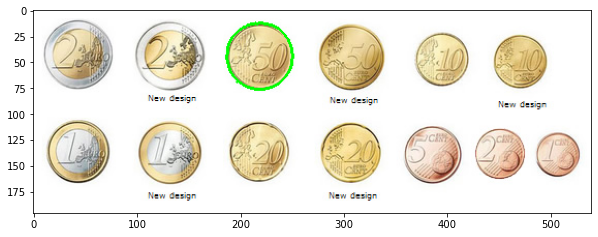

In [75]:
coins_contours = rgb_coins.copy()

cv2.drawContours(coins_contours, sort_left_to_right[4], -1, (0,255,0),2)
imshow(coins_contours)

In [ ]:
imshow(house, False, False)

In [ ]:
ret, th = cv2.threshold(house, 128, 255,cv2.THRESH_BINARY_INV)
imshow(th, False, False)

In [ ]:
house, contours, h = cv2.findContours(th, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
house_copy = house.copy()
cv2.drawContours(house_copy, contours, -1, (0,255,0),2)
imshow(house_copy, False)

In [ ]:
house, contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

accuracy = 0.03

for contour in house_contours:
    perimeter = cv2.arcLength(contour, True)
    epsilon = accuracy * perimeter
    approx = cv2.approxPolyDP(contour, epsilon, True)

    cv2.drawContours(house_copy, [approx], 0, (0,255,0),2)

imshow(house_copy)

In [ ]:
# CAR
imshow(car)

In [ ]:
ret, th = cv2.threshold(car_gray, 127, 255, cv2.THRESH_BINARY_INV)
imshow(th, False, False)


In [ ]:
car_copy = car.copy()
car_contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    hull = cv2.convexHull(contour)
    cv2.drawContours(car_copy, [hull], 0, (0,255,0),2)

imshow(car_copy)


In [ ]:
car_copy_rect = car.copy()

x, y, width, height = cv2.boundingRect(th)
# print(x, y, width, height)


cv2.rectangle(car_copy_rect, (x,y), (x+width, y+height), (0,255,0),2)
imshow(car_copy_rect)

In [ ]:
car_copy_circle = car.copy()

x, y, radius = cv2.minEnclosingCircle(car_contours[1])
# print(x, y)
center = (int(x), int(y))
radius(int(radius))

cv2.circle(car_copy_circle, conter, radius, (0,255,0),2)

imshow(car_copy_circle)

In [ ]:
ellipse - cv2.fitEllipse()